In [25]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})
#plt.rcParams['text.latex.preamble']=[r'sansmath']

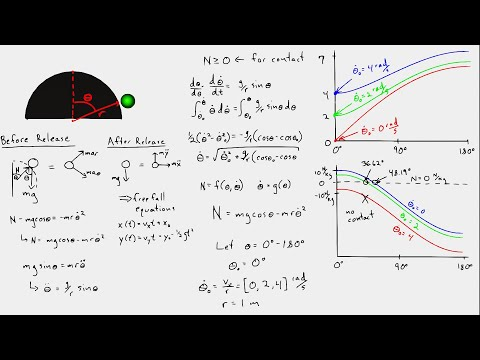

In [27]:
from IPython.display import YouTubeVideo
YouTubeVideo('uOq4AbvWF08')

# Rolling on hemisphere

![rolling on hemisphere note](./hemisphere-rolling.png)


In this example, a small ball with negligible moment of inertia rolls on a hemisphere and loses contact at some point. Your goal is to determine the point where the ball loses contact with the hemisphere. The hemisphere has radius, $R=1~m$, and the ball has mass $m=1~kg$. 

There are two states in this problem:

1. Ball and hemisphere are in contact with normal force $N>0$
2. Ball and hemisphere are not in contact, so normal force $N=0$

There cannot be a state where $N<0$ because that would mean there is an attractive force between the ball and hemisphere. 

## Equation of motion and contact force

Using the free body diagram and kinetic diagram, you can derive these two equations for state 1 (contact):

1. $\ddot{\theta} = \frac{g}{R}\sin\theta$
2. $N = mg\cos\theta-mR\dot{\theta}^2$

Integrate equation 1 by using the chain rule, 

$\frac{d\theta}{d\theta}\frac{d\dot{\theta}}{dt} = \frac{g}{R}\sin\theta$

$\frac{d\theta}{dt}\frac{d\dot{\theta}}{d\theta} = \frac{g}{R}\sin\theta$

$\int_{\dot{\theta}_0}^{\dot{\theta}}\dot{\theta}d\dot{\theta} = 
\int_{\theta_0}^{\theta}\frac{2g}{R}\sin\theta$

$\dot{\theta} = \sqrt{\dot{\theta}_0^2+\frac{g}{R}(\cos\theta_0-\cos\theta)}$

Now, you plot the relation between $\theta$ and $\dot{\theta}$ for initial conditions, 

- $\theta_0 = 0~rad$ and $\dot{\theta}_0=0~rad/s$
- $\theta_0 = 0~rad$ and $\dot{\theta}_0=2~rad/s$
- $\theta_0 = 0~rad$ and $\dot{\theta}_0=4~rad/s$

> __Reflection:__When do you expect the ball to lose contact for 0, 2, and 4 rad/s angular velocities? Will it happen sooner or later if the ball is travelling faster at the top of the hemisphere?

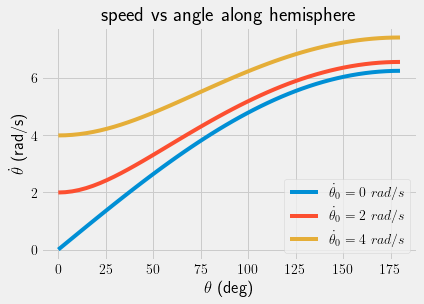

In [22]:
theta = np.linspace(0,np.pi)
dtheta = lambda dt0,theta: np.sqrt(dt0**2+2*9.81/1*(1-np.cos(theta)))
plt.plot(theta*180/np.pi, dtheta(0, theta), label=r'$\dot{\theta}_0=0~rad/s$')
plt.plot(theta*180/np.pi, dtheta(2, theta), label=r'$\dot{\theta}_0=2~rad/s$')
plt.plot(theta*180/np.pi, dtheta(4, theta), label=r'$\dot{\theta}_0=4~rad/s$')
plt.title('speed vs angle along hemisphere')
plt.legend()
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot{\theta}$ (rad/s)');


## Normal force prediction
The second equation relates the normal force, $N$ to $\theta$ and $\dot{\theta}$. Now, plot the $N-vs-\theta$. 

$N = mg\cos\theta-mR\dot{\theta}^2$

If this equation predicts $N<0$, then the ball has lost contact with the hemisphere. It will transition into a freefalling object with initial position and velocity, 

When N=0, transition state:
- $\mathbf{r} = R\hat{e}_r=R(\sin\theta\hat{i}+\cos\theta\hat{j})$
- $\mathbf{v} = R\dot{\theta}\hat{e}_{\theta}= R\dot{\theta}(\cos\theta\hat{i}-\sin\theta\hat{j})$

Below, you see the plots for $N-vs-\theta$ for $\theta = 0-180^o$,



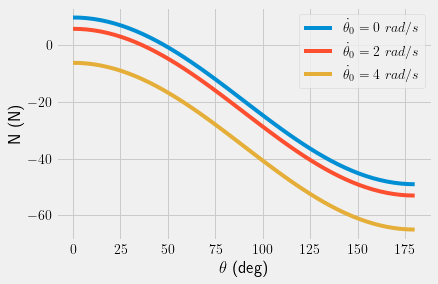

In [24]:
N0 = 9.81*np.cos(theta)-1*dtheta(0, theta)**2
N2 = 9.81*np.cos(theta)-1*dtheta(2, theta)**2
N4 = 9.81*np.cos(theta)-1*dtheta(4, theta)**2

plt.plot(theta*180/np.pi, N0, label=r'$\dot{\theta}_0=0~rad/s$')
plt.plot(theta*180/np.pi, N2, label=r'$\dot{\theta}_0=2~rad/s$')
plt.plot(theta*180/np.pi, N4, label=r'$\dot{\theta}_0=4~rad/s$')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'N (N)')
plt.legend()


## Solving for loss-of-contact

The graph above reveals that at $\dot{\theta}_0=4~rad/s$, the ball never makes contact with the hemisphere. It skims the top, and falls as

- $x(t) = 4t~[m]$
- $y(t) = 1-\frac{g}{2}t^2~[m]$

In the cases of $\dot{\theta}_0=0~and~2~rad/s$, the ball loses contact between $\theta=25^o-50^o$. You can use algebra to solve for $N(\theta^*)=0$, where $\theta^*$ is the location where contact is lost. 

_or_


You have Python here that can solve nolinear problems. Import `fsolve` from the `scipy.optimize` library. 

In [16]:
from scipy.optimize import fsolve

### Defining and solving a nonlinear equation

You have two equations, 

1. $\dot{\theta} = \sqrt{\dot{\theta}_0^2+\frac{g}{R}(\cos\theta_0-\cos\theta)} = g(\dot{\theta}_0,~\theta)$
2. $N = mg\cos\theta-mR\dot{\theta}^2 = f(\theta,~\dot{\theta}) = f(\theta, g(\dot{\theta}_0,~\theta))$

For clarity, you can define equation (1) first, then use it in equation (2) as such

In [30]:
dtheta = lambda dt0,theta: np.sqrt(dt0**2+2*9.81/1*(1-np.cos(theta)))
N = lambda dt0, theta: 9.81*np.cos(theta)-1*dtheta(dt0, theta)**2

In [32]:
thetastar_0 = fsolve(lambda x: N(0, x), np.pi/3)*180/np.pi
thetastar_2 = fsolve(lambda x: N(2, x), np.pi/3)*180/np.pi

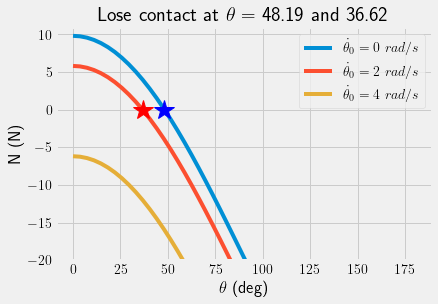

In [50]:
plt.plot(theta*180/np.pi, N0, label=r'$\dot{\theta}_0=0~rad/s$')
plt.plot(theta*180/np.pi, N2, label=r'$\dot{\theta}_0=2~rad/s$')
plt.plot(theta*180/np.pi, N4, label=r'$\dot{\theta}_0=4~rad/s$')
plt.plot(thetastar_0[0], N(0,thetastar_0*np.pi/180), 'b*', markersize=20)
plt.plot(thetastar_2[0], N(2,thetastar_2*np.pi/180), 'r*', markersize=20)
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'N (N)')
plt.title(r'Lose contact at $\theta=$ '+'{:.2f} and {:.2f}'.format(thetastar_0[0], thetastar_2[0]))
plt.ylim(-20,11)
plt.legend()

## Wrapping up

In this notebook, you compared two possible states for a ball rolling on a hemisphere: contact and no contact. You used free body diagrams, kinetic diagrams, and the chain rule to find the transition between contact and no contact. 

You used [`scipy.optimize.fsolve`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html) to solve for when a function is 0. 